A heart attack occurs when the flow of blood to the heart is blocked. The blockage is most often a buildup of fat, cholesterol and other substances, which form a plaque in the arteries that feed the heart (coronary arteries).

The plaque eventually breaks away and forms a clot. The interrupted blood flow can damage or destroy part of the heart muscle.

A heart attack, also called a myocardial infarction, can be fatal, but treatment has improved dramatically over the years, however the diagnosis for heart diseases are expensive and complex. 

The tests you'll need to diagnose your heart disease depend on what condition your doctor thinks you might have. No matter what type of heart disease you have, your doctor will likely perform a physical exam and ask about your personal and family medical history before doing any tests. Besides blood tests and a chest X-ray, tests to diagnose heart disease can include[1]:

Electrocardiogram (ECG).
Holter monitoring. 
Echocardiogram. 
Stress test. 
Cardiac catheterization.
Cardiac computerized tomography (CT) scan. 
Cardiac magnetic resonance imaging (MRI).

[1]https://www.mayoclinic.org/diseases-conditions/heart-disease/diagnosis-treatment/drc-20353124

Lets see how Machine Learning Models are used in predicting Heart Attack in human.

Context
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

Content

Attribute Information: 
*  age 
* sex 
* chest pain type (4 values) 
* resting blood pressure 
* serum cholestoral in mg/dl 
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved 
* exercise induced angina 
* oldpeak = ST depression induced by exercise relative to rest 
* the slope of the peak exercise ST segment 
* number of major vessels (0-3) colored by flourosopy 
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory



# Any results you write to the current directory are saved as output.
dataset = pd.read_csv("../input/heart.csv")
dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


* we need to check if there is any Null values in the dataset. 
* If there are any Null then we need to impute the values.

In [2]:
dataset.isnull().values.any()


False

* Check the datatypes to see if we need to perform encoding categorical data

In [3]:
dataset.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

* Feature selection is one of the most important step in machine learning.
* Irrelevant Parameters will lower the performance of the model.
* lets try out the first method, correlation heat map.

In [4]:
Corr = dataset.corr()
Corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


* plotting heatmap to analyze the correlation of all the parameters.

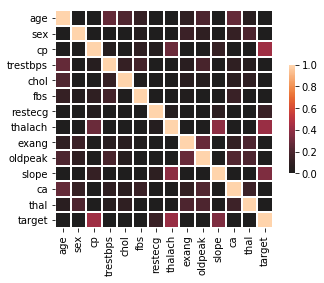

In [5]:
sb.heatmap(Corr,vmin=0, vmax=1, center=0,
            square=True, linewidths=1, cbar_kws={"shrink": .5})

* second method of feature selction
* Univariate Selection

In [6]:
X = dataset.iloc[:,0:13]  
y = dataset.iloc[:,-1]
#apply SelectKBest class to extract best features
parameters = SelectKBest(score_func=chi2, k=13)
fit = parameters.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(13,'Score'))  #print 10 best features

       Specs       Score
7    thalach  188.320472
9    oldpeak   72.644253
11        ca   66.440765
2         cp   62.598098
8      exang   38.914377
4       chol   23.936394
0        age   23.286624
3   trestbps   14.823925
10     slope    9.804095
1        sex    7.576835
12      thal    5.791853
6    restecg    2.978271
5        fbs    0.202934


* Third Method of feature selection 
* Feature Importance

[0.06818071 0.04632173 0.15771697 0.05774729 0.05664726 0.02108425
 0.03607221 0.079363   0.0871085  0.06793604 0.08539567 0.13034752
 0.10607884]


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


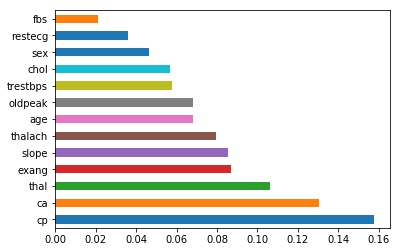

In [7]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

* Now let us build our model
* we have already seperated x and y dataset
* lets choose test and training set.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)



lets scale the features

Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

* Fitting SVM to the Training set

In [10]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

* lets see how many corrct and in incorrect predictions through confusion matrix
* Making the Confusion Matrix

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[24,  9],
       [ 2, 41]])

* our model is making 65 correct predictions and 11 incorrect prediction

* Lets find out the Recall and Specifity 

In [12]:
Recall = cm[0,0]/(cm[0,0]+cm[1,0])
print('Recall : ', Recall )

Sp = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specifity : ', Sp)

Recall :  0.9230769230769231
Specifity :  0.82


* Our Model is making good prediction with SVM linear kernel method